<a href="https://colab.research.google.com/github/MiaMiya/02807-computational-tools-/blob/main/Week2/exercises_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02807 - Week 2 Exercises


## Learning objectives:

* Run Python code in Colab or Jupyter notebooks
* Get hands-on experience storing, manipulating and extracting data efficiently with NumPy.
* Perform optimised computations on arrays using NumPy’s vectorised functions. 
* Compare the performance of simple non-vectorised operations to vectorised one. 


## Readings:

### **Numpy**:

Main reading:

* [Chapter 2: Introduction to Numpy](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html). Python Data Science Handbook.

Supplementary readings:

* [A Visual Intro to NumPy and Data Representation](https://jalammar.github.io/visual-numpy/)
* [Guide to NumPy resources: beginner, intermediate and advanced](https://e2eml.school/numpy_resources.html)



## Exercise 1: importing NumPy

### **1. Import numpy as np and print the version number**


In [5]:
print("Solution")
# your solution goes here
import numpy as np
print(np.__version__)

Solution
1.20.1


## Exercise 2: creating arrays

### a. Create a 1D array of numbers from 0 to 9

Desired output: 
```
Solution
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
```

In [6]:
print("Solution")
# your solution goes here
Array_1 = np.array([0,1,2,3,4,5,6,7,8,9])
Array_1

Solution


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### b. Create a 3×3 Boolean array of all `True`’s

Desired output: 

```
array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])
```

In [8]:
print("Solution")
# you solution goes here
Array_2 = np.array([True]*9).reshape([3,3])
Array_2

Solution


array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### c. Create a 5 x 3 x 4 array randomly filled with integers between 0 and 4, inclusive:

hint: ``np.random.randint``

Example of desired output:

```
array([[[3, 4, 0, 4],
        [2, 3, 4, 4],
        [0, 2, 4, 2]],

       [[2, 1, 3, 0],
        [4, 3, 2, 2],
        [2, 1, 2, 4]],

       [[3, 1, 1, 1],
        [4, 4, 0, 1],
        [0, 2, 3, 0]],

       [[3, 0, 3, 3],
        [4, 0, 3, 3],
        [3, 3, 0, 1]],

       [[3, 2, 2, 2],
        [0, 1, 1, 4],
        [4, 2, 1, 0]]])

```

In [12]:
print("Solution")
# your solution goes here
Array_3 = np.random.randint(5, size=(5,3,4))
Array_3

Solution


array([[[2, 2, 1, 1],
        [4, 3, 1, 1],
        [3, 0, 4, 0]],

       [[3, 1, 4, 0],
        [1, 1, 0, 2],
        [0, 3, 0, 2]],

       [[3, 4, 2, 1],
        [4, 3, 3, 3],
        [4, 1, 2, 4]],

       [[4, 3, 2, 1],
        [2, 3, 4, 4],
        [0, 4, 3, 1]],

       [[2, 3, 4, 0],
        [3, 3, 1, 0],
        [2, 1, 0, 0]]])

## Exercise 3: universal functions and vectorisation (part 1). Faster dot product.

The dot product is an algebraic operation which takes two equal-sized vectors and returns a single scalar. For two vectors $\mathbf{x}$ and $\mathbf{y}$, their dot product is defined as:

$$\mathbf{x} \cdot \mathbf{y} = \sum_{i=1}^{n}x_iy_i = x_1y_1 + x_2y_2 + … + x_ny_n$$

Let's consider the following vectors.

In [13]:
X = np.random.rand(100000)
Y = np.random.rand(100000)

In Python, one way to calulate the dot product is to iterate over the number of elements in the vectors, multiplying their $i$-th elements, and accumulating the result:

In [14]:
def dot_slow_1(x,y):
    """"Dot product by looping over elements and multiplying them"""
    s = 0 
    for i in range(x.size):
        s += x[i] * y[i]
    return s

A more succinct and pythonic way to do this would be to use list comprehension:

In [16]:
def dot_slow_2(x, y):
    """Dot product as sum of list comprehension doing element-wise multiplication"""
    return sum(x_i * y_i for x_i, y_i in zip(x, y))

Let's look at the performance we get computing dot products in this way.

In [17]:
print("Time and memory use of dot_slow_1:")
%timeit dot_slow_1(X, Y)

print("Time and memory use of dot_slow_2:")
%timeit dot_slow_2(X, Y)

Time and memory use of dot_slow_1:
29.7 ms ± 570 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Time and memory use of dot_slow_2:
21.5 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Use NumPy's vectorised operations to define a function that computes the dot product.

In [26]:
def my_dot(x, y):
  # your solution goes here
  return np.dot(x,y)

Use `%timeit` to check the performance of your function. How much faster did we get with vectorisation? If you did things right, your solution should run in *µs*, running around 1000x faster per loop than the non-vectorised `dot_slow` functions.

In [27]:
print("Time and memory use of my_dot:")
%timeit my_dot(X, Y)

Time and memory use of my_dot:
14.6 µs ± 425 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Exercise 4: universal functions and vectorisation (part 2). Buying low, selling high.

Let's look at a more interesting problem. Here's a classic technical interview problem:

> Given a stock’s price history as a sequence, and assuming that you are only allowed to make one purchase and one sale, what is the maximum profit that can be obtained? For example, given prices = (20, 18, 14, 17, 20, 21, 15), the max profit would be 7, from buying at 14 and selling at 21.



The straighforward solution, with $O(n^2)$ [time complexity](https://www.hackerearth.com/practice/basic-programming/complexity-analysis/time-and-space-complexity/tutorial/), consists of taking every combination of two consecutive prices and determining the maximum difference.

However, there's also an $O(n)$ solution that consists of iterating through the sequence just once and finding the difference between each price and a running minimum. Here's an non-vectorised implementation:


In [28]:
def profit(prices):
    max_price = 0
    min_price = prices[0]
    for price in prices[1:]:
        min_price = min(min_price, price)
        max_price = max(price - min_price, max_price)
    return max_price

prices = (20, 18, 14, 17, 20, 21, 15)
profit(prices)

7

Can this be done faster in NumPy? Certainly. But first, let’s create a more realistic example (using, of course, some trusty NumPy functions!):

In [71]:
import numpy as np
# Set seed for randn below
np.random.seed(2)

# Create mostly NaN array with a few 'turning points' (local min/max).
prices = np.full(100, fill_value=np.nan)
prices[[0, 10, 50, 80, -1]] = [80., 30., 50., 70., 40.]

# Linearly interpolate the missing values and add some noise.
x = np.arange(len(prices))
is_valid = ~np.isnan(prices)
prices = np.interp(x=x, xp=x[is_valid], fp=prices[is_valid])
prices += np.random.randn(len(prices)) * 2

Let's look at the data with `matplotlib`. Don't worry if you don't get what goes on here. We'll learn how to use `matplotlib` for data visualisation in the coming weeks.

The idea is to buy low (green) and sell high (red):

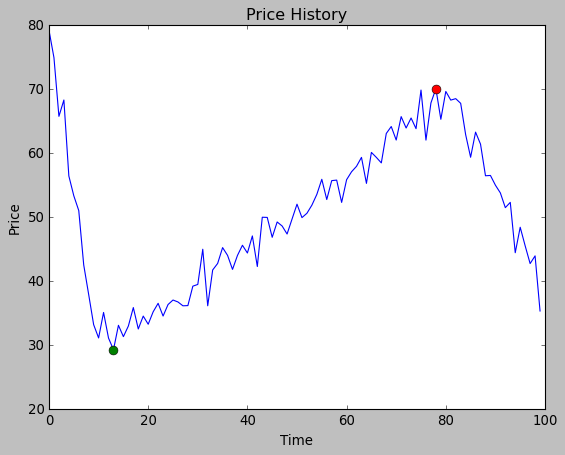

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

# Warning! This isn't a fully correct solution, but it works for now.
# If the absolute min came after the absolute max, you'd have trouble.
mn = np.argmin(prices)
mx = mn + np.argmax(prices[mn:])
kwargs = {'markersize': 8, 'linestyle': ''}

fig, ax = plt.subplots()
ax.plot(prices)
ax.set_title('Price History')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.plot(mn, prices[mn], marker='o', color='g', **kwargs)
ax.plot(mx, prices[mx], marker='o', color='r', **kwargs)
plt.show()

What does a NumPy implementation look like? There is no `np.runmin()` that computes the running (or cumulative) minimum. However, NumPy’s universal functions (`ufunc`'s) all have an `accumulate()` method that does what its name implies:



In [33]:
x = np.array([10,2,4,7,9,1,11,3])
runmin = np.minimum.accumulate
runmin(x)

array([10,  2,  2,  2,  2,  1,  1,  1], dtype=int32)

Use `runmin` and other NumPy functions to define your own version of the `profit` function. Keeping the logic from the pure-Python example, you can find the difference between each price and a running minimum (element-wise), and then take the max of this sequence:

In [63]:
def my_profit(prices):
    #"""Price minus cumulative minimum price, element-wise."""
    runmin = np.minimum.accumulate
    runmax = np.maximum.accumulate
     # your solution goes here
    return (runmax(prices) - runmin(prices))[-1]
my_profit(prices)
    #return np.minimum.accumulate(prices) - np.minimum.accumulate(prices)

49.90233519541609

Let's see the time performance of the original `profit` function on our dataset.

In [60]:
print("The maximum profit is", profit(prices))
%timeit profit(prices)

The maximum profit is 40.79275676698767
37.3 µs ± 460 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


How does `my_profit` compare? Your NumPy solution should do at least as well as the pure-Python solution over this small dataset (we're working with 100 data points). 

In [61]:
print("The maximum profit is", my_profit(prices))
%timeit my_profit(prices)

The maximum profit is 49.90233519541609
1.63 µs ± 26.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)




Over a large dataset, you'll normally see significant performance differences. Our implementation of `my_profit` typically runs about 50x faster than `profit` over a random dataset with 1.000.000 datapoints. Do you get comparable results?

In [62]:
rand_seq = np.random.randint(0, 100, size=1000000)
%timeit profit(rand_seq)
%timeit my_profit(rand_seq)

347 ms ± 716 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.33 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Exercise 5: extracting information from arrays

Let's extract some potentially useful information from our `prices` dataset.


### a. Let's find all values in a given range. Extract all prices with values between 45 and 65 from the first 10 prices in `prices`.


In [64]:
print("First 10 prices")
prices_small = prices[:10]
prices_small

First 10 prices


array([79.16648431, 74.88746635, 65.72760781, 68.28054162, 56.41312883,
       53.31650527, 51.00576283, 42.50942383, 37.88409556, 33.18198477])

In [66]:
print("Solution")
# your solution goes here
Array_extract1 = [x for x in prices_small if x >= 45 and x <= 65]
Array_extract1

Solution


[56.41312882961027, 53.31650526868759, 51.00576283431609]

### b. Let's say that you want to buy in the first time the price drops below 30. Let's find the first occurence of a value meeting a condition. 

Hint: use `np.argwhere`.

In [75]:
# Solution
print("Solution")
# your solution goes here
index1 = np.argwhere(prices < 30)
index1

Solution


array([[13]], dtype=int64)

### c. Let's get the *positions* and *values* of the top 5 prices overall. Use NumPy only to extract this information.

Hint: Use `np.argwhere` along with `np.percentile`, or sort and slice arrays

In [88]:
# Solution
print("Positions of the top 5 prices")  
# your solution goes here
sort_index = np.argsort(prices)
print(sort_index[-5:])

print("Values of the top 5 prices")
# your solution goes here
prices_sort = np.sort(prices)
print(prices_sort[-5:])

Positions of the top 5 prices
[80 75 78  1  0]
Values of the top 5 prices
[69.62106147 69.83564078 70.05690588 74.88746635 79.16648431]


### d. Let's get some summary statistics. Print the mean, median and standard deviation of the list of prices.

The desired output is:

```
Mean, median and standard deviation: 50.770589574397285 50.45810666998631 12.125291517615116
```

In [90]:
# Solution
# your solution goes here.
print(f"Mean {np.mean(prices)}, median {np.median(prices)}, and Standard deviation {np.std(prices)}")

Mean 50.3425177322348 median 50.27218190956815 and Standard deviation 11.948370999142766


### e. Finally, let's find all the local maxima in the `prices` array. 

If you are up for the challenge, you can try to use NumPy functions only. Otherwise, the package `scipy.signal` offers a nice function called `find_peaks`.

In [95]:
# Solution
print("Local maxima")
boolean = np.r_[True, prices[1:] < prices[:-1]] & np.r_[prices[:-1] < prices[1:], True]
peaks1 = np.argwhere(boolean == True)

# your solution goes here
peaks

Local maxima


array([ 3, 11, 14, 17, 19, 22, 25, 31, 35, 39, 41, 43, 46, 50, 55, 58, 63,
       65, 69, 71, 73, 75, 78, 80, 82, 86, 89, 93, 95, 98], dtype=int64)

Here are the maxima found with `scipy`.

In [96]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(prices, height=0)
peaks

array([ 3, 11, 14, 17, 19, 22, 25, 31, 35, 39, 41, 43, 46, 50, 55, 58, 63,
       65, 69, 71, 73, 75, 78, 80, 82, 86, 89, 93, 95, 98], dtype=int64)

If you store the local maxima in a variable called `peaks`, the following plot will mark them in green.

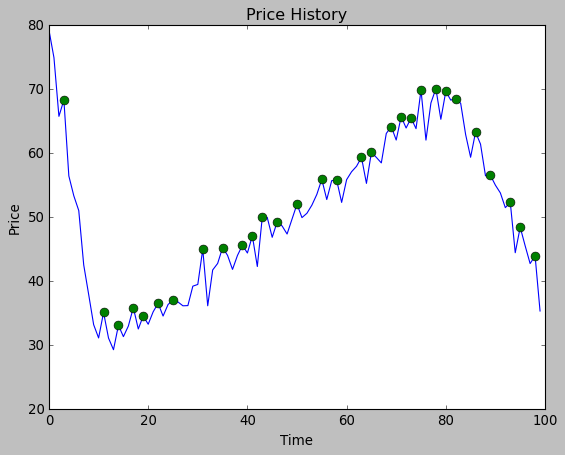

In [92]:
kwargs = {'markersize': 8, 'linestyle': ''}

fig, ax = plt.subplots()
ax.plot(prices)
ax.set_title('Price History')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.plot(peaks, prices[peaks], marker='o', color='g', **kwargs)
plt.show()